Benchmark Models: Random Forest and LSTMs

In [19]:
# import necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [20]:
# import dataset
merged_df = pd.read_csv('merged_df.csv')

Preprocessing Pipeline

In [21]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define target variables and feature variables
X = merged_df.drop(columns=['DEP_DATE_TIME', 'ACC_DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DELAY_GROUP'])
y = merged_df['DEP_DELAY_GROUP']

# Replace -2 and -1 with 0 in the target labels
y = y.replace({-2: 0, -1: 0})

# Define numerical and categorical columns
categorical_cols = ['ORIGIN', 'DEST']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure encoder learns all categories, even those missing in training
all_categories = {col: X[col].unique() for col in categorical_cols}

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(categories=[all_categories[col] for col in categorical_cols], drop='first', handle_unknown='ignore'), categorical_cols)
    ])

# Preprocess the data (Fit on training data and transform both training and test data)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert to PyTorch tensors
X_train_torch = torch.FloatTensor(X_train_processed.toarray())  # Convert sparse matrix to dense
Y_train_torch = torch.LongTensor(Y_train.values)  # Convert target variable to tensor
X_test_torch = torch.FloatTensor(X_test_processed.toarray())  # Convert sparse matrix to dense
Y_test_torch = torch.LongTensor(Y_test.values)  # Convert target variable to tensor

# Normalize data
scaler = StandardScaler()
X_train_torch = torch.tensor(scaler.fit_transform(X_train_torch), dtype=torch.float32)
X_test_torch = torch.tensor(scaler.transform(X_test_torch), dtype=torch.float32)

# Generate feature names after OneHotEncoding for categorical columns
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = numerical_cols + list(categorical_feature_names)

# Debugging: Print categories learned by OneHotEncoder
print("Categories learned by OneHotEncoder:", preprocessor.named_transformers_['cat'].categories_)

# Now feature_names is the list of all the feature names you need for plotting
print("Feature names:", feature_names)

Categories learned by OneHotEncoder: [array(['JFK'], dtype=object), array(['LAX', 'SFO', 'SJU', 'PHX', 'TPA', 'RSW', 'FLL', 'PBI', 'BQN',
       'MCO', 'ATL', 'MIA', 'STT', 'MSY', 'LAS', 'BOS', 'SLC', 'SRQ',
       'MSP', 'BUR', 'DEN', 'HOU', 'LGB', 'SYR', 'JAX', 'SEA', 'AUS',
       'PWM', 'RIC', 'RDU', 'OAK', 'IAD', 'DTW', 'ORD', 'BTV', 'BUF',
       'ROC', 'SAN', 'DCA', 'CLT', 'PIT', 'CVG', 'PHL', 'BWI', 'EGE',
       'MCI', 'BGR', 'CLE', 'SJC', 'SMF', 'ALB', 'BDL', 'IAH', 'PDX',
       'IND', 'STL', 'MKE', 'BNA', 'ORF', 'PSE', 'DFW', 'CMH', 'MEM',
       'ACK', 'SNA', 'SAT', 'LWB', 'MVY', 'HNL', 'PSP', 'CHS', 'SDF',
       'ABQ', 'BHM', 'JAC', 'SAV', 'HYA', 'RNO', 'DAB', 'TUS', 'ORH'],
      dtype=object)]
Feature names: ['CANCELLED', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'HOURLYVISIBILITY', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed', 'HOURLYStationPressure', 'HOURLYSeaLevelPressure', 'HOURLYPrecip', 'HOURLYAltimeterSetting', 'HOUR

Random Forest

c:\Users\mhair\mlpractical\mlp\MLP_Project\mlpc\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mhair\mlpractical\mlp\MLP_Project\mlpc\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Set Metrics:
Accuracy: 0.8394
Precision: 0.7046
Recall: 0.8394
F1-score: 0.7661

Test Set Metrics:
Accuracy: 0.8391
Precision: 0.7041
Recall: 0.8391
F1-score: 0.7657


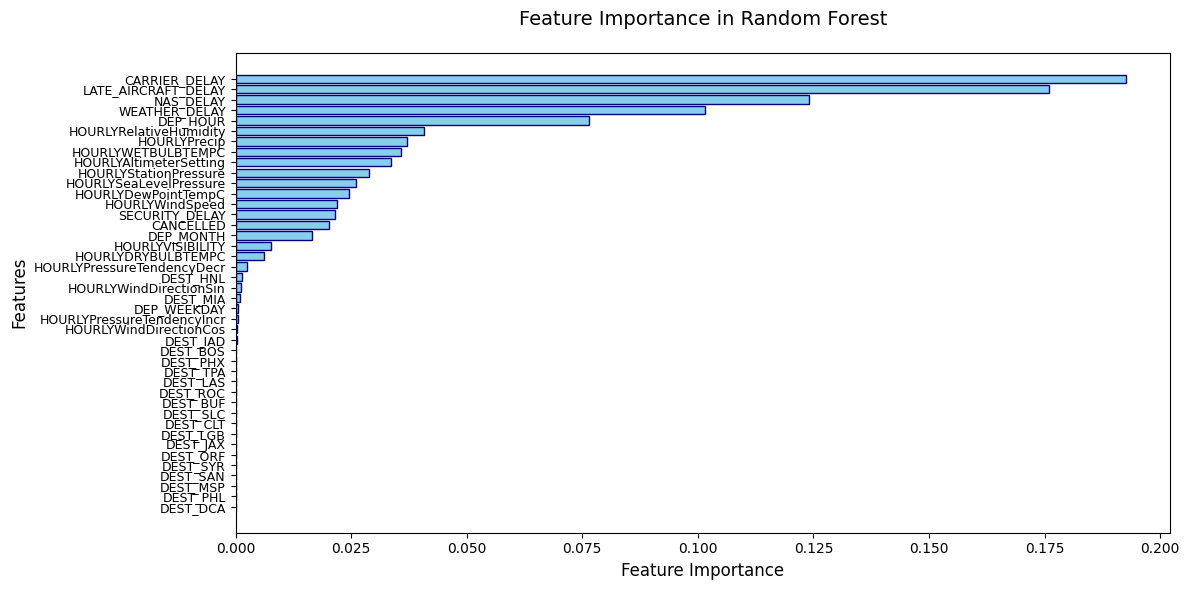

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize and train a Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=2,       # Max depth for each tree
    min_samples_leaf=100,  # Minimum samples per leaf
    min_samples_split=50,  # Minimum samples to split a node
    max_leaf_nodes=12,  # Max leaf nodes for each tree
    random_state=42
)

# Train the Random Forest model
rf_model.fit(X_train_torch.numpy(), Y_train_torch.numpy())  # Convert tensors to NumPy arrays for scikit-learn

# Predict on the training and test sets
y_pred_train = rf_model.predict(X_train_torch.numpy())
y_pred_test = rf_model.predict(X_test_torch.numpy())

# Calculate metrics for training and test sets
train_accuracy = accuracy_score(Y_train_torch.numpy(), y_pred_train)
train_precision = precision_score(Y_train_torch.numpy(), y_pred_train, average='weighted')
train_recall = recall_score(Y_train_torch.numpy(), y_pred_train, average='weighted')
train_f1 = f1_score(Y_train_torch.numpy(), y_pred_train, average='weighted')

test_accuracy = accuracy_score(Y_test_torch.numpy(), y_pred_test)
test_precision = precision_score(Y_test_torch.numpy(), y_pred_test, average='weighted')
test_recall = recall_score(Y_test_torch.numpy(), y_pred_test, average='weighted')
test_f1 = f1_score(Y_test_torch.numpy(), y_pred_test, average='weighted')

# Print the metrics
print(f'\nTraining Set Metrics:')
print(f'Accuracy: {train_accuracy:.4f}')
print(f'Precision: {train_precision:.4f}')
print(f'Recall: {train_recall:.4f}')
print(f'F1-score: {train_f1:.4f}')

print(f'\nTest Set Metrics:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1-score: {test_f1:.4f}')

# Feature importance plot for Random Forest (only non-zero features)
importance_data = pd.DataFrame({
    'Feature': feature_names,  # Use the feature names obtained after preprocessing
    'Importance': rf_model.feature_importances_
})

# Filter out features with zero importance
importance_data = importance_data[importance_data['Importance'] > 0]

# Sort by importance
importance_data = importance_data.sort_values('Importance', ascending=True)

# Plot feature importance (only non-zero features)
plt.figure(figsize=(12, 6))
plt.barh(importance_data['Feature'], 
         importance_data['Importance'],
         color='skyblue',
         edgecolor='navy')

plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance in Random Forest', fontsize=14, pad=20)

# Reduce font size for feature labels
plt.yticks(fontsize=9)  # Adjust y-axis label font size

plt.tight_layout()

# Save the feature importance plot
plt.savefig('rf_feature_importance_plot.png',
            dpi=300,
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')

# Show the plot
plt.show()

LSTM model

Epoch [10/100], Loss: 0.1704, Accuracy: 0.9355
Epoch [20/100], Loss: 0.1618, Accuracy: 0.9386
Epoch [30/100], Loss: 0.1574, Accuracy: 0.9401
Epoch [40/100], Loss: 0.1548, Accuracy: 0.9411
Epoch [50/100], Loss: 0.1529, Accuracy: 0.9419
Epoch [60/100], Loss: 0.1513, Accuracy: 0.9428
Epoch [70/100], Loss: 0.1501, Accuracy: 0.9428
Epoch [80/100], Loss: 0.1490, Accuracy: 0.9434
Epoch [90/100], Loss: 0.1483, Accuracy: 0.9437
Epoch [100/100], Loss: 0.1475, Accuracy: 0.9439

Test Set Metrics:
Accuracy: 0.9356
Precision: 0.9320
Recall: 0.9356
F1-score: 0.9335


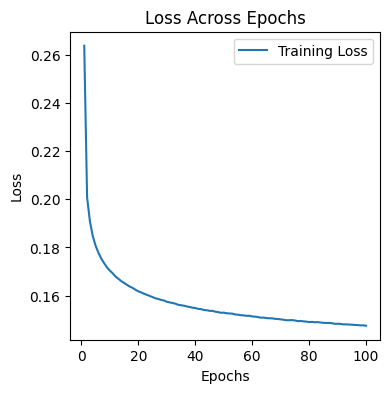

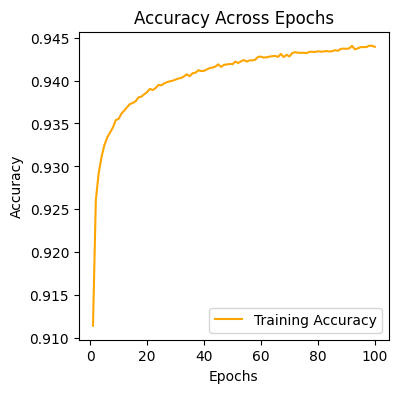

In [22]:
# Define LSTM model class
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)  # LSTM layer
        self.fc = nn.Linear(hidden_size, num_classes)  # Fully connected layer

    def forward(self, x):
        x = x.unsqueeze(1)  # Reshape input to (batch_size, 1, input_size)
        out, _ = self.lstm(x)  # LSTM forward pass
        out = out[:, -1, :]  # Get the last time step's output
        out = self.fc(out)  # Fully connected layer
        return out

# Model hyperparameters
input_size = X_train_torch.shape[1]  
hidden_size = 64  
num_classes = len(torch.unique(Y_train_torch))  

# Initialize model
model = LSTMModel(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training parameters
num_epochs = 100
batch_size = 64

# DataLoader setup
train_data = TensorDataset(X_train_torch, Y_train_torch)
test_data = TensorDataset(X_test_torch, Y_test_torch)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Tracking loss and accuracy
train_loss_list = []
train_accuracy_list = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0

    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)  
        loss = criterion(outputs, batch_y)  
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

        # Compute accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == batch_y).sum().item()
        total += batch_y.size(0)

    # Average loss and accuracy for the epoch
    avg_loss = epoch_loss / len(train_loader)
    avg_accuracy = correct / total
    train_loss_list.append(avg_loss)
    train_accuracy_list.append(avg_accuracy)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}')

# Evaluate on test set
model.eval()
y_pred_test = []
y_true_test = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        outputs = model(batch_x)
        _, predicted = torch.max(outputs, 1)
        y_pred_test.extend(predicted.cpu().numpy())
        y_true_test.extend(batch_y.cpu().numpy())

# Calculate metrics
test_accuracy = accuracy_score(y_true_test, y_pred_test)
test_precision = precision_score(y_true_test, y_pred_test, average='weighted')
test_recall = recall_score(y_true_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_true_test, y_pred_test, average='weighted')

# Print evaluation metrics
print(f'\nTest Set Metrics:')
print(f'Accuracy: {test_accuracy:.4f}')
print(f'Precision: {test_precision:.4f}')
print(f'Recall: {test_recall:.4f}')
print(f'F1-score: {test_f1:.4f}')

# Plot loss
plt.figure(figsize=(4, 4))
plt.plot(range(1, num_epochs + 1), train_loss_list, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Across Epochs')
plt.legend()
plt.savefig('training_loss_plot_LSTM.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot accuracy
plt.figure(figsize=(4, 4))
plt.plot(range(1, num_epochs + 1), train_accuracy_list, label='Training Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Across Epochs')
plt.legend()
plt.savefig('training_accuracy_plot_LSTM.png', dpi=300, bbox_inches='tight')
plt.show()

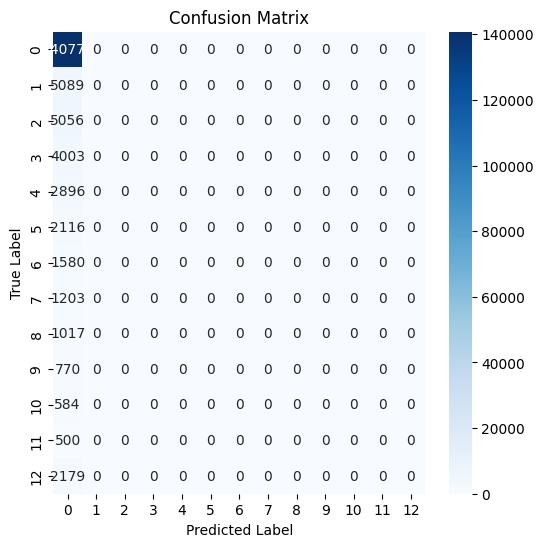

In [26]:
# confusion matrix:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_true_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_LSTM.png', dpi=300, bbox_inches='tight')
plt.show()

to do:
- consider parameters more closely